# Section 3 CARTE DE CONTROLE
- Recuper les BDD et Tracer de carte de Controle


[datetime.datetime(2024, 5, 15, 23, 59, 30, 305963), datetime.datetime(2024, 5, 15, 19, 18, 39, 611651), datetime.datetime(2024, 5, 15, 10, 48, 55, 761084), datetime.datetime(2024, 5, 15, 5, 6, 10, 565191), datetime.datetime(2024, 5, 14, 23, 2, 31, 498974), datetime.datetime(2024, 5, 14, 20, 5, 28, 371700), datetime.datetime(2024, 5, 14, 12, 4, 34, 903165), datetime.datetime(2024, 5, 14, 6, 52, 5, 438229), datetime.datetime(2024, 5, 13, 23, 9, 0, 376073), datetime.datetime(2024, 5, 13, 17, 51, 54, 647370), datetime.datetime(2024, 5, 13, 11, 52, 4, 469647), datetime.datetime(2024, 5, 13, 5, 26, 35, 997161), datetime.datetime(2024, 5, 12, 23, 59, 50, 55209), datetime.datetime(2024, 5, 12, 20, 5, 20, 183080), datetime.datetime(2024, 5, 12, 13, 19, 43, 669509), datetime.datetime(2024, 5, 12, 6, 40, 35, 514601), datetime.datetime(2024, 5, 12, 0, 56, 50, 887006), datetime.datetime(2024, 5, 11, 19, 15, 48, 607775), datetime.datetime(2024, 5, 11, 12, 17, 20, 845245), datetime.datetime(2024, 5,

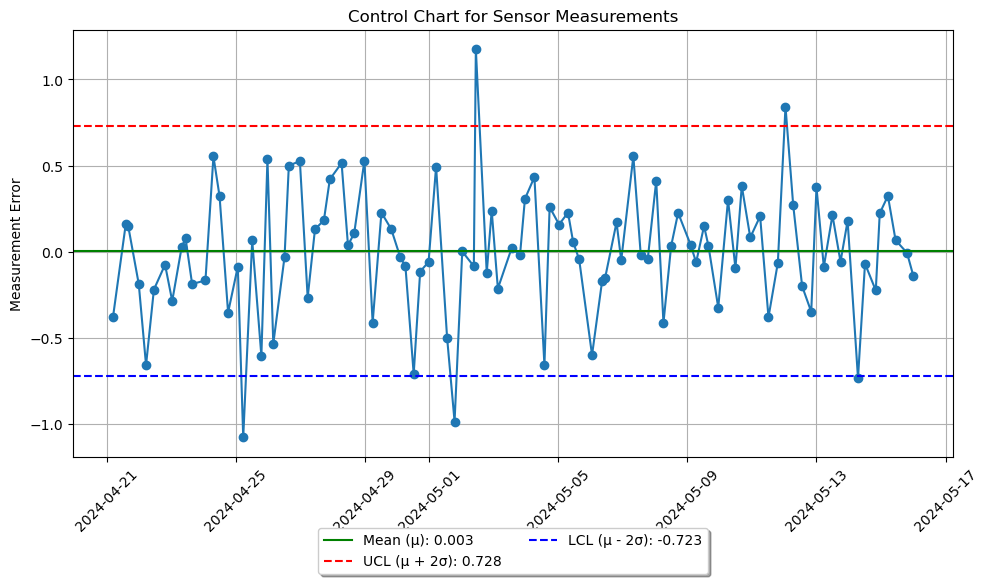

In [14]:
import psycopg
import matplotlib.pyplot as plt
import numpy as np

# Connect to the database
def connect_db():
    return psycopg.connect(
        host="iutinfo-sgbd.uphf.fr",
        user="iutinfo388",
        password="7bubHOUf",
        dbname="capteurs",
        port="5432")

# Function to fetch data
def fetch_data(sensor_id):
    conn = connect_db()
    data = []
    try:
        with conn:
            with conn.cursor() as cur:
                cur.execute("""
                    SELECT SM.timestamp AS sensor_timestamp, SM.sensorvalue AS sensor_value,
                           CM.controltimestamp AS control_timestamp, CM.controlvalue AS control_value,
                           (SM.sensorvalue - CM.controlvalue) AS measurement_error
                    FROM SensorMeasurement SM
                    JOIN ControlMeasurement CM ON SM.sensorid = CM.sensorid AND SM.timestamp = CM.sensortimestamp
                    WHERE SM.sensorid = %s
                    ORDER BY SM.timestamp DESC
                    LIMIT 100;  
                """, (sensor_id,))
                rows = cur.fetchall()
                
                for row in rows:
                    data.append({
                        "sensor_timestamp": row[0],
                        "sensor_value": row[1],
                        "control_timestamp": row[2],
                        "control_value": row[3],
                        "measurement_error": row[4]
                    })
    finally:
        conn.close()
    return data

# Function to calculate mean and standard deviation
def calculate_stats(data):
    errors = [row["measurement_error"] for row in data]
    mean_val = np.mean(errors)
    print(mean_val)
    std_dev = np.std(errors)
    return mean_val, std_dev

# Function to plot the control chart
def plot_control_chart(data):
    timestamps = [row["sensor_timestamp"] for row in data]
    print(timestamps)
    errors = [row["measurement_error"] for row in data]
    mean_val, std_dev = calculate_stats(data)
    print("mean_val: ",mean_val)
    print("Standard deviation", std_dev)
    
    ucl = mean_val + 2 * std_dev
    lcl = mean_val - 2 * std_dev
    print(ucl, lcl)

    plt.figure(figsize=(10, 6))
    plt.plot(timestamps, errors, marker='o', linestyle='-')
    plt.axhline(mean_val, color='green', label=f'Mean (μ): {mean_val:.3f}')
    plt.axhline(ucl, color='red', linestyle='--', label=f'UCL (μ + 2σ): {ucl:.3f}')
    plt.axhline(lcl, color='blue', linestyle='--', label=f'LCL (μ - 2σ): {lcl:.3f}')
    plt.title('Control Chart for Sensor Measurements')
    plt.xlabel('Timestamp')
    plt.ylabel('Measurement Error')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

sensor_id = 1  
data = fetch_data(sensor_id)
plot_control_chart(data)


# Section 4 : STATISTIQUE

0.0029423368600903386


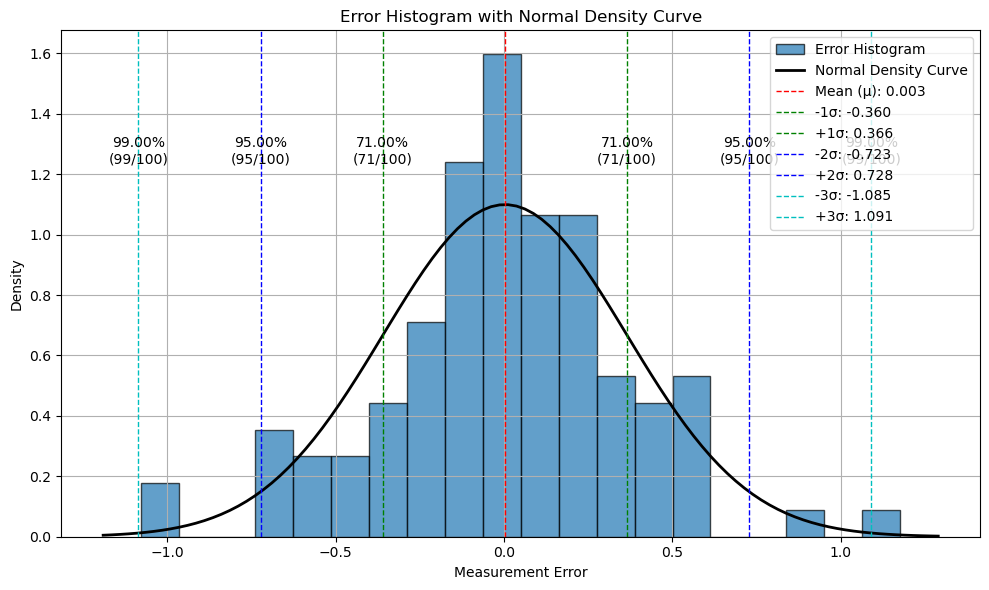

Number of points between -1σ and +1σ: 71
Percentage of points between -1σ and +1σ: 71.000%
Number of points between -2σ and +2σ: 95
Percentage of points between -2σ and +2σ: 95.000%
Number of points between -3σ and +3σ: 99
Percentage of points between -3σ and +3σ: 99.000%
Theoretical percentage of points outside -1σ and +1σ: 29.000%
Theoretical percentage of points outside -2σ and +2σ: 5.000%
Theoretical percentage of points outside -3σ and +3σ: 1.000%


In [15]:
#Histogramm
import psycopg
import matplotlib.pyplot as plt
import numpy as np

# Connect to the database
def connect_db():
    return psycopg.connect(
        host="iutinfo-sgbd.uphf.fr",
        user="iutinfo388",
        password="7bubHOUf",
        dbname="capteurs",
        port="5432"
    )

# Function to fetch data
def fetch_data(sensor_id):
    conn = connect_db()
    data = []
    try:
        with conn:
            with conn.cursor() as cur:
                cur.execute("""
                    SELECT SM.timestamp AS sensor_timestamp, SM.sensorvalue AS sensor_value,
                           CM.controltimestamp AS control_timestamp, CM.controlvalue AS control_value,
                           (SM.sensorvalue - CM.controlvalue) AS measurement_error
                    FROM SensorMeasurement SM
                    JOIN ControlMeasurement CM ON SM.sensorid = CM.sensorid AND SM.timestamp = CM.sensortimestamp
                    WHERE SM.sensorid = %s
                    ORDER BY SM.timestamp DESC
                    LIMIT 100;  
                """, (sensor_id,))
                rows = cur.fetchall()
                
                for row in rows:
                    data.append({
                        "sensor_timestamp": row[0],
                        "sensor_value": row[1],
                        "control_timestamp": row[2],
                        "control_value": row[3],
                        "measurement_error": row[4]
                    })
    finally:
        conn.close()
    return data

# Function to calculate mean and standard deviation
def calculate_stats(data):
    errors = [row["measurement_error"] for row in data]
    mean_val = np.mean(errors)
    print(mean_val)
    std_dev = np.std(errors)
    return mean_val, std_dev

# Function to calculate percentage within intervals
def calculate_percentage_within_intervals(errors, mean_val, std_dev):
    counts = {}
    percentages = {}
    intervals = [1, 2, 3]
    
    for k in intervals:
        lower_bound = mean_val - k * std_dev
        upper_bound = mean_val + k * std_dev
        count_within_bounds = sum(1 for e in errors if lower_bound <= e <= upper_bound)
        counts[k] = count_within_bounds
        percentages[k] = (count_within_bounds / len(errors)) * 100
    
    return counts, percentages

# Function to plot error histogram with normal curve
def plot_error_histogram_with_normal_curve(data):
    errors = [row["measurement_error"] for row in data]
    mean_val, std_dev = calculate_stats(data)
    counts, percentages = calculate_percentage_within_intervals(errors, mean_val, std_dev)
    
    # Plot the histogram of errors
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(errors, bins=20, density=True, edgecolor='black', alpha=0.7, label='Error Histogram')
    
    # Plot the normal density curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean_val) / std_dev) ** 2)
    plt.plot(x, p, 'k', linewidth=2, label='Normal Density Curve')
    
    # Add annotations for the normal curve
    plt.axvline(mean_val, color='r', linestyle='dashed', linewidth=1, label=f'Mean (μ): {mean_val:.3f}')
    plt.axvline(mean_val - std_dev, color='g', linestyle='dashed', linewidth=1, label=f'-1σ: {mean_val - std_dev:.3f}')
    plt.axvline(mean_val + std_dev, color='g', linestyle='dashed', linewidth=1, label=f'+1σ: {mean_val + std_dev:.3f}')
    plt.axvline(mean_val - 2 * std_dev, color='b', linestyle='dashed', linewidth=1, label=f'-2σ: {mean_val - 2 * std_dev:.3f}')
    plt.axvline(mean_val + 2 * std_dev, color='b', linestyle='dashed', linewidth=1, label=f'+2σ: {mean_val + 2 * std_dev:.3f}')
    plt.axvline(mean_val - 3 * std_dev, color='c', linestyle='dashed', linewidth=1, label=f'-3σ: {mean_val - 3 * std_dev:.3f}')
    plt.axvline(mean_val + 3 * std_dev, color='c', linestyle='dashed', linewidth=1, label=f'+3σ: {mean_val + 3 * std_dev:.3f}')
    
    plt.title('Error Histogram with Normal Density Curve')
    plt.xlabel('Measurement Error')
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.grid(True)
    
    # Add annotations for the percentages
    y_max = max(n)
    for k in [1, 2, 3]:
        plt.text(mean_val + k * std_dev, y_max * 0.8, f'{percentages[k]:.2f}%\n({counts[k]}/{len(errors)})', color='black', 
                 horizontalalignment='center', verticalalignment='center')
        plt.text(mean_val - k * std_dev, y_max * 0.8, f'{percentages[k]:.2f}%\n({counts[k]}/{len(errors)})', color='black', 
                 horizontalalignment='center', verticalalignment='center')
    
    plt.tight_layout()
    plt.show()
    
    return counts, percentages

sensor_id = 1  
data = fetch_data(sensor_id)
counts, percentages = plot_error_histogram_with_normal_curve(data)

# Display the results
for k in counts:
    print(f"Number of points between -{k}σ and +{k}σ: {counts[k]}")
    print(f"Percentage of points between -{k}σ and +{k}σ: {percentages[k]:.3f}%")

# Theoretical distribution of points outside the intervals
for k in counts:
    print(f"Theoretical percentage of points outside -{k}σ and +{k}σ: {100 - percentages[k]:.3f}%")


In [16]:
# P-Value Calculation
import math

# Function to calculate binomial probability
def binomial_probability(n, k, p):
    # Calculate binomial coefficient C(n, k)
    coeff = math.factorial(n) / (math.factorial(k) * math.factorial(n - k))
    # Calculate probability P(X = k)
    prob = coeff * (p ** k) * ((1 - p) ** (n - k))
    return prob

# Example calculations
p = 0.5
n = 15
p_12 = binomial_probability(n, 12, p)
p_13 = binomial_probability(n, 13, p)
p_14 = binomial_probability(n, 14, p)
p_15 = binomial_probability(n, 15, p)

p = 0.5
n = 20
p_15_2 = binomial_probability(n, 15, p)
p_16 = binomial_probability(n, 16, p)
p_17 = binomial_probability(n, 17, p)
p_18 = binomial_probability(n, 18, p)

p_value_2 = p_15_2 + p_16 + p_17 + p_18
print(p_value_2)

# Probability of success (above or below the mean)
p = 0.5
n = 10  # Number of points

# Calculate probabilities
p_8 = binomial_probability(n, 8, p)
p_9 = binomial_probability(n, 9, p)
p_10 = binomial_probability(n, 10, p)

# Calculate p-value
p_value = p_8 + p_9 + p_10
print(f"P-value for at least 8 out of 10 points on the same side of the mean: {p_value:.4f}")

# Probability of being outside [-2σ, +2σ]
p_outside = 0.05
n = 7  # Number of points

# Calculate probabilities
p_0 = binomial_probability(n, 0, p_outside)
p_1 = binomial_probability(n, 1, p_outside)

# Calculate p-value
p_value = 1 - (p_0 + p_1)
print(f"P-value for at least 2 out of 7 points outside [-2σ, +2σ]: {p_value:.4f}")

# Probability of being outside [-σ, +σ]
p_outside_sigma = 0.29
n = 10  # Number of points

# Calculate probabilities
p_7 = binomial_probability(n, 7, p_outside_sigma)
p_8 = binomial_probability(n, 8, p_outside_sigma)
p_9 = binomial_probability(n, 9, p_outside_sigma)
p_10 = binomial_probability(n, 10, p_outside_sigma)

# Calculate p-value
p_value = p_7 + p_8 + p_9 + p_10
print(f"P-value for at least 7 out of 10 points outside [-σ, +σ]: {p_value:.4f}")

# Calculate p-value for custom rule
n = 6
k = 5
# The probability that a point is within the interval [−1.5σ, +1.5σ] is approximately 86.64% -> 1 - 0.8664 = 0.1336.
p = 0.1336
p_value = binomial_probability(n, k, p)
print(f"P-value for at least 5 out of 6 points outside [-1.5σ, +1.5σ]: {p_value:.4f}")

import psycopg
import matplotlib.pyplot as plt
import numpy as np

# Connect to the database
def connect_db():
    return psycopg.connect(
        host="iutinfo-sgbd.uphf.fr",
        user="iutinfo388",
        password="7bubHOUf",
        dbname="capteurs",
        port="5432"
    )

# Function to fetch data
def fetch_data(sensor_id):
    conn = connect_db()
    data = []
    try:
        with conn:
            with conn.cursor() as cur:
                cur.execute("""
                    SELECT SM.timestamp AS sensor_timestamp, SM.sensorvalue AS sensor_value,
                           CM.controltimestamp AS control_timestamp, CM.controlvalue AS control_value,
                           (SM.sensorvalue - CM.controlvalue) AS measurement_error
                    FROM SensorMeasurement SM
                    JOIN ControlMeasurement CM ON SM.sensorid = CM.sensorid AND SM.timestamp = CM.sensortimestamp
                    WHERE SM.sensorid = %s
                    ORDER BY SM.timestamp DESC
                    LIMIT 100;  
                """, (sensor_id,))
                rows = cur.fetchall()
                
                for row in rows:
                    data.append({
                        "sensor_timestamp": row[0],
                        "sensor_value": row[1],
                        "control_timestamp": row[2],
                        "control_value": row[3],
                        "measurement_error": row[4]
                    })
    finally:
        conn.close()
    return data

# Function to calculate mean and standard deviation
def calculate_stats(data):
    errors = [row["measurement_error"] for row in data]
    mean_val = np.mean(errors)
    std_dev = np.std(errors)
    return mean_val, std_dev

# Function to check rules
def check_rules(data):
    mean_val, std_dev = calculate_stats(data)
    
    # Rule 1: At least 8 out of the last 10 points on the same side of the mean
    last_10_errors = [row["measurement_error"] for row in data[-10:]]
    same_side = sum(1 for error in last_10_errors if error > mean_val or error < mean_val)  # Simplification
    if same_side >= 8:
        print("Rule 1 triggered: At least 8 out of 10 points are on the same side of the mean.")
    
    # Rule 2: At least 2 out of the last 7 points outside the interval [-2σ, +2σ]
    last_7_errors = [row["measurement_error"] for row in data[-7:]]
    outside_2sigma = sum(1 for error in last_7_errors if error < mean_val - 2*std_dev or error > mean_val + 2*std_dev)
    if outside_2sigma >= 2:
        print("Rule 2 triggered: At least 2 out of 7 points are outside [-2σ, +2σ].")
    
    # Rule 3: At least 7 out of the last 10 points outside [-σ, +σ]
    outside_sigma = sum(1 for error in last_10_errors if error < mean_val - std_dev or error > mean_val + std_dev)
    if outside_sigma >= 7:
        print("Rule 3 triggered: At least 7 out of 10 points are outside [-σ, +σ].")

# Execute the rules on the data
data = fetch_data(1)
check_rules(data)

# Function to check custom rule
def check_custom_rule(data):
    mean_val, std_dev = calculate_stats(data)
    
    # Custom Rule: At least 5 out of the last 6 points outside [-1.5σ, +1.5σ]
    last_6_errors = [row["measurement_error"] for row in data[-6:]]
    outside_1_5sigma = sum(1 for error in last_6_errors if error < mean_val - 1.5*std_dev or error > mean_val + 1.5*std_dev)
    if outside_1_5sigma >= 5:
        print("Custom Rule triggered: At least 5 out of 6 points are outside [-1.5σ, +1.5σ].")

# Execute the custom rule on the data
check_custom_rule(data)


0.020674705505371094
P-value for at least 8 out of 10 points on the same side of the mean: 0.0547
P-value for at least 2 out of 7 points outside [-2σ, +2σ]: 0.0444
P-value for at least 7 out of 10 points outside [-σ, +σ]: 0.0087
P-value for at least 5 out of 6 points outside [-1.5σ, +1.5σ]: 0.0002
Rule 1 triggered: At least 8 out of 10 points are on the same side of the mean.


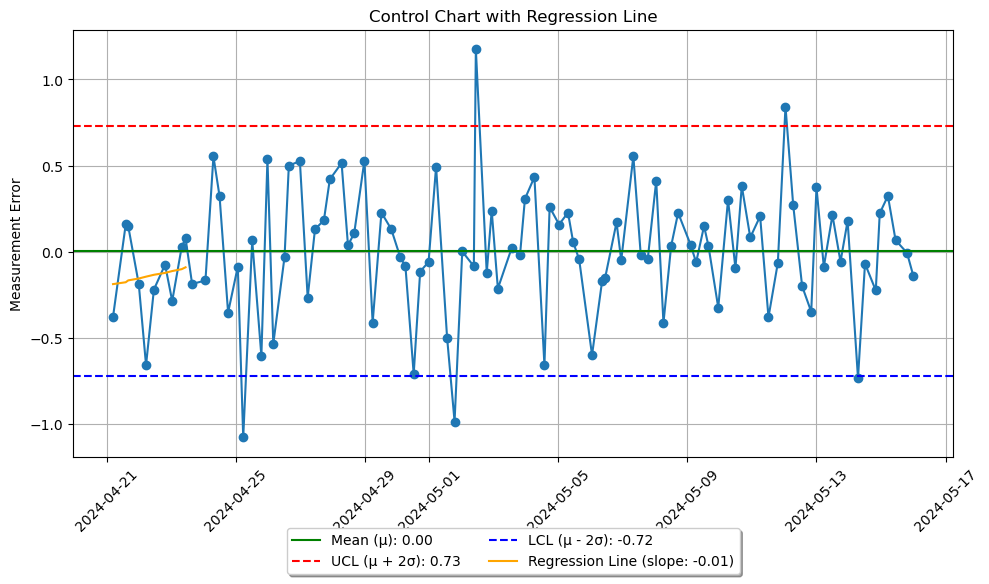

-0.010829790527163761


In [21]:
# Drift and Regression
import psycopg
import matplotlib.pyplot as plt
import numpy as np

def connect_db():
    return psycopg.connect(
        host="iutinfo-sgbd.uphf.fr",
        user="iutinfo388",
        password="7bubHOUf",
        dbname="capteurs",
        port="5432"
    )

def fetch_data(sensor_id):
    conn = connect_db()
    data = []
    try:
        with conn:
            with conn.cursor() as cur:
                cur.execute("""
                    SELECT SM.timestamp AS sensor_timestamp, SM.sensorvalue AS sensor_value,
                           CM.controltimestamp AS control_timestamp, CM.controlvalue AS control_value,
                           (SM.sensorvalue - CM.controlvalue) AS measurement_error
                    FROM SensorMeasurement SM
                    JOIN ControlMeasurement CM ON SM.sensorid = CM.sensorid AND SM.timestamp = CM.sensortimestamp
                    WHERE SM.sensorid = %s
                    ORDER BY SM.timestamp DESC
                    LIMIT 100;  
                """, (sensor_id,))
                rows = cur.fetchall()
                
                for row in rows:
                    data.append({
                        "sensor_timestamp": row[0],
                        "sensor_value": row[1],
                        "control_timestamp": row[2],
                        "control_value": row[3],
                        "measurement_error": row[4]
                    })
    finally:
        conn.close()
    return data

def calculate_stats(data):
    errors = [row["measurement_error"] for row in data]
    mean_val = np.mean(errors)
    std_dev = np.std(errors)
    return mean_val, std_dev

def linear_regression(x, y):
    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    num = sum((x[i] - x_mean) * (y[i] - y_mean) for i in range(n))
    den = sum((x[i] - x_mean) ** 2 for i in range(n))
    
    slope = num / den
    intercept = y_mean - slope * x_mean
    
    return slope, intercept

def plot_control_chart_with_regression(data):
    timestamps = [row["sensor_timestamp"] for row in data]
    errors = [row["measurement_error"] for row in data]
    mean_val, std_dev = calculate_stats(data)
    
    ucl = mean_val + 2*std_dev
    lcl = mean_val - 2*std_dev

    plt.figure(figsize=(10, 6))
    plt.plot(timestamps, errors, marker='o', linestyle='-')
    plt.axhline(mean_val, color='green', label=f'Mean (µ): {mean_val:.2f}')
    plt.axhline(ucl, color='red', linestyle='--', label=f'UCL (µ + 2σ): {ucl:.2f}')
    plt.axhline(lcl, color='blue', linestyle='--', label=f'LCL (µ - 2σ): {lcl:.2f}')
    
    # Calculate linear regression on the last 10 points
    if len(errors) >= 10:
        last_10_errors = errors[-10:]
        last_10_timestamps = np.arange(10)
        slope, intercept = linear_regression(last_10_timestamps, last_10_errors)
        regression_line = [slope * x + intercept for x in last_10_timestamps]
        plt.plot(timestamps[-10:], regression_line, color='orange', linestyle='-', label=f'Regression Line (slope: {slope:.2f})')

    plt.title('Control Chart with Regression Line')
    plt.xlabel('Timestamp')
    plt.ylabel('Measurement Error')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return slope

data = fetch_data(1)
print(plot_control_chart_with_regression(data))
# The date is reversed because the method to retrieve from the database is ORDER BY
